In [1]:
import sys
sys.path.append("../../")

import json
import os
import time
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as matdates

from projects.data_cleaning import *

os.makedirs("_cache", exist_ok=True)

DATABASE_DIR = '../../outputs/all/'

# arf: acute renal failure
pid_arf = []
pid_arf_valid = []

pid_arf_cache_path = '_cache/pid_arf.npy'
pid_arf_valid_cache_path = '_cache/pid_arf_valid.npy'
if os.path.exists(pid_arf_cache_path) and os.path.exists(pid_arf_valid_cache_path):
    pid_arf = np.load(pid_arf_cache_path, allow_pickle=True)
    pid_arf_valid = np.load(pid_arf_valid_cache_path, allow_pickle=True)
else:
    raise ValueError("ARF data not found.")

In [2]:
# arf_dataset = np.load('processed/patient_data_acute_renal_failure.npy', allow_pickle=True).item()
# arf_pids = np.load('processed/acute_renal_failure/acute_renal_failure_cases_valid.npy')

# Add admission time information to relative time offset

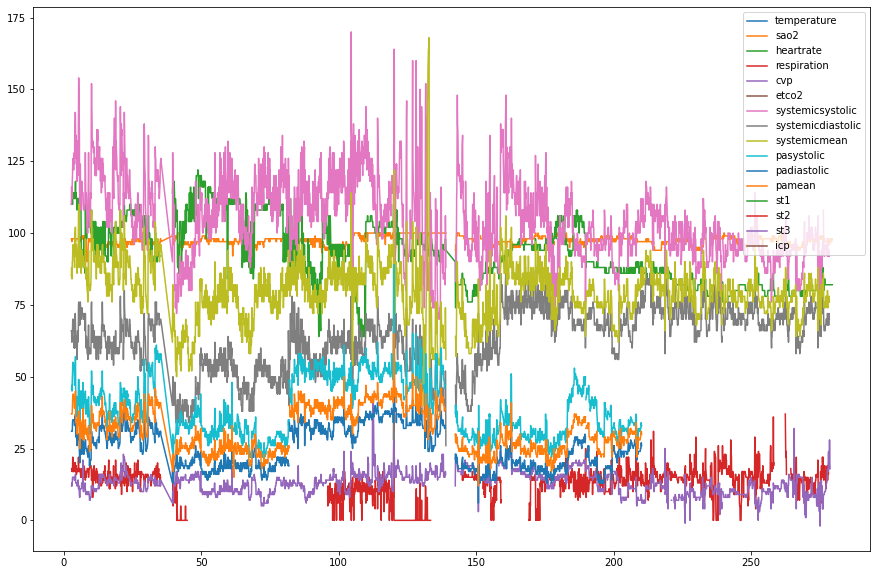

In [3]:
pid = pid_arf_valid[0]
data = load_patient_data_by_id(DATABASE_DIR, pid)

admittime = data['patient']['unitadmittime24'][0]
admittime = datetime.datetime.strptime(admittime, '%H:%M:%S').time()
hour_since_admit = admittime.hour + admittime.minute / 60

vitaloffset = data['vitalPeriodic']['observationoffset']
vitaloffset = [i / 60 + hour_since_admit for i in vitaloffset]
vitals = data['vitalPeriodic']

sort_idx = np.argsort(np.array(vitaloffset))

fig, axs = plt.subplots(figsize=(15,10))
for k in vitals.keys():
    if k != 'observationoffset' and k != 'vitalperiodicid' and k != 'patientunitstayid':
        axs.plot(np.array(vitaloffset)[sort_idx], np.array(vitals[k])[sort_idx], label=k)
axs.legend()

# Plot with datetime formatting

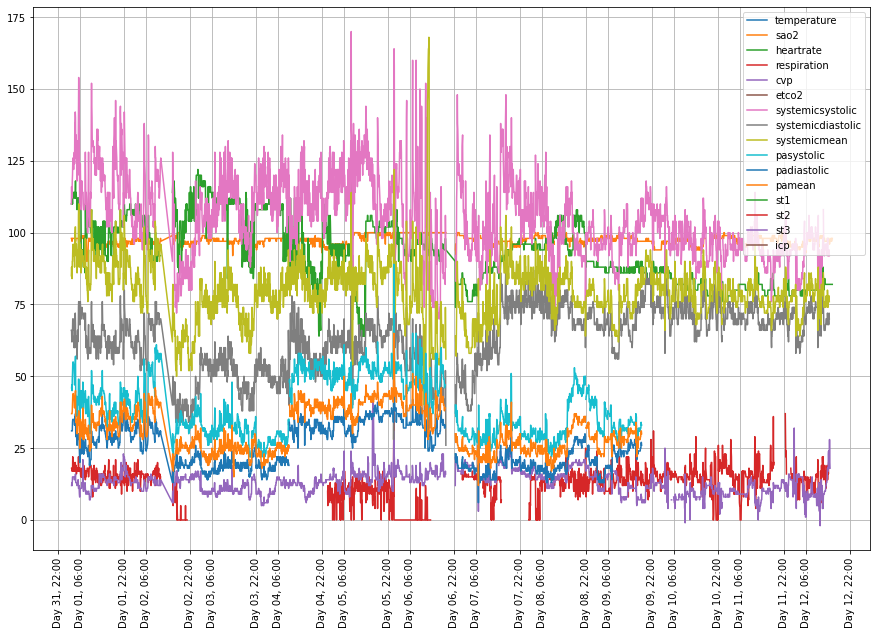

In [4]:
# pid = arf_pids[0]
# data = arf_dataset[pid]
pid = pid_arf_valid[0]
data = load_patient_data_by_id(DATABASE_DIR, pid)

admittime = data['patient']['unitadmittime24'][0]
admittime = datetime.datetime.strptime(admittime, '%H:%M:%S')
vitals = data['vitalPeriodic']
vitaloffset = vitals['observationoffset']
vitaloffset = [datetime.timedelta(minutes=float(offset)) for offset in vitaloffset]

ts = [admittime + offset for offset in vitaloffset]

sort_idx = np.argsort(np.array(ts))

fig, ax = plt.subplots(figsize=(15,10))
for k in vitals.keys():
    if k != 'observationoffset' and k != 'vitalperiodicid' and k != 'patientunitstayid':
        ax.plot(np.array(ts)[sort_idx], np.array(vitals[k])[sort_idx], label=k)
ax.legend()
ax.grid()

locator = matdates.HourLocator(byhour=[6,22])
locator.MAXTICKS  = 40000
majorFmt = matdates.DateFormatter('Day %d, %H:%M')  

ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(majorFmt)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
plt.show()

# Plot patient data statistics with aligned timestamp

Text(0, 0.5, 'heartrate')

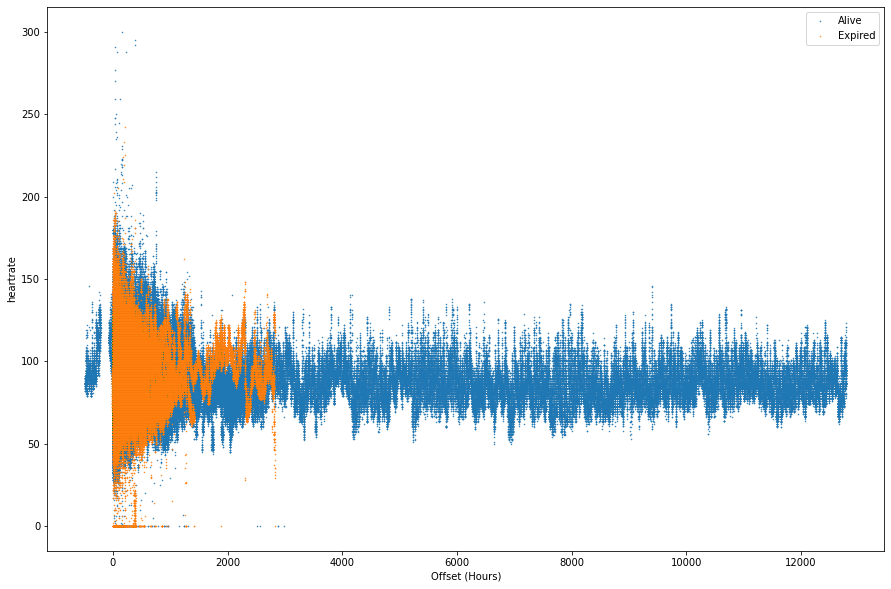

In [5]:
x_live = []
y_live = []
x_expired = []
y_expired = []

for pid in pid_arf_valid:
    data = load_patient_data_by_id(DATABASE_DIR, pid)
    
    admittime = data['patient']['unitadmittime24'][0]
    admittime = datetime.datetime.strptime(admittime, '%H:%M:%S').time()
    hour_since_admit = admittime.hour + admittime.minute / 60

    signal_source = data['vitalPeriodic']
    signal = signal_source['heartrate']
    offset = signal_source['observationoffset']
    offset = [i / 60 + hour_since_admit for i in offset]

    if data['patient']['unitdischargestatus'][0] == 'Alive':
        x_live += list(offset)
        y_live += list(signal)
    elif data['patient']['unitdischargestatus'][0] == 'Expired':
        x_expired += list(offset)
        y_expired += list(signal)
        
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(x_live, y_live, marker='.', ms=1, linestyle = 'None')
ax.plot(x_expired, y_expired, marker='.', ms=1, linestyle = 'None')
ax.legend(["Alive", "Expired"])
ax.set_xlabel("Offset (Hours)")
ax.set_ylabel('heartrate')

Text(0, 0.5, 'systemicsystolic')

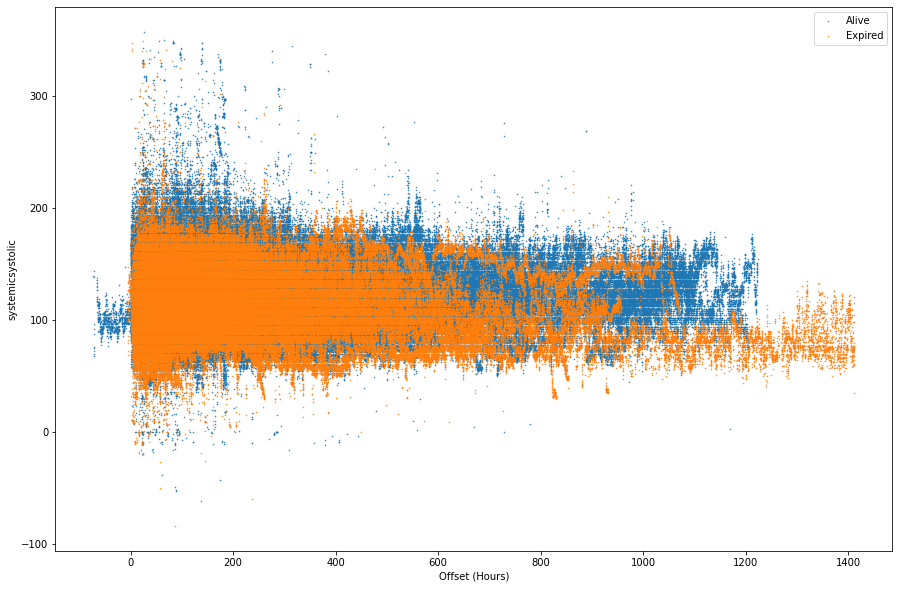

In [7]:
x_live = []
y_live = []
x_expired = []
y_expired = []

for pid in pid_arf_valid:
    data = load_patient_data_by_id(DATABASE_DIR, pid)
    
    admittime = data['patient']['unitadmittime24'][0]
    admittime = datetime.datetime.strptime(admittime, '%H:%M:%S').time()
    hour_since_admit = admittime.hour + admittime.minute / 60

    signal_source = data['vitalPeriodic']
    signal = signal_source['systemicsystolic']
    offset = signal_source['observationoffset']
    offset = [i / 60 + hour_since_admit for i in offset]

    if data['patient']['unitdischargestatus'][0] == 'Alive':
        x_live += list(offset)
        y_live += list(signal)
    elif data['patient']['unitdischargestatus'][0] == 'Expired':
        x_expired += list(offset)
        y_expired += list(signal)
        
        
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(x_live, y_live, marker='.', ms=1, linestyle = 'None')
ax.plot(x_expired, y_expired, marker='.', ms=1, linestyle = 'None')
ax.legend(["Alive", "Expired"])
ax.set_xlabel("Offset (Hours)")
ax.set_ylabel('systemicsystolic')

# ax[0].plot(x_live, y_live, marker='.', ms=1, linestyle = 'None')
# ax[0].grid()
# ax[0].legend(["Alive"])
# ax[1].plot(x_expired, y_expired, marker='.', ms=1, linestyle = 'None')
# ax[1].grid()
# ax[1].legend(["Expired"])

Text(0, 0.5, 'respiration')

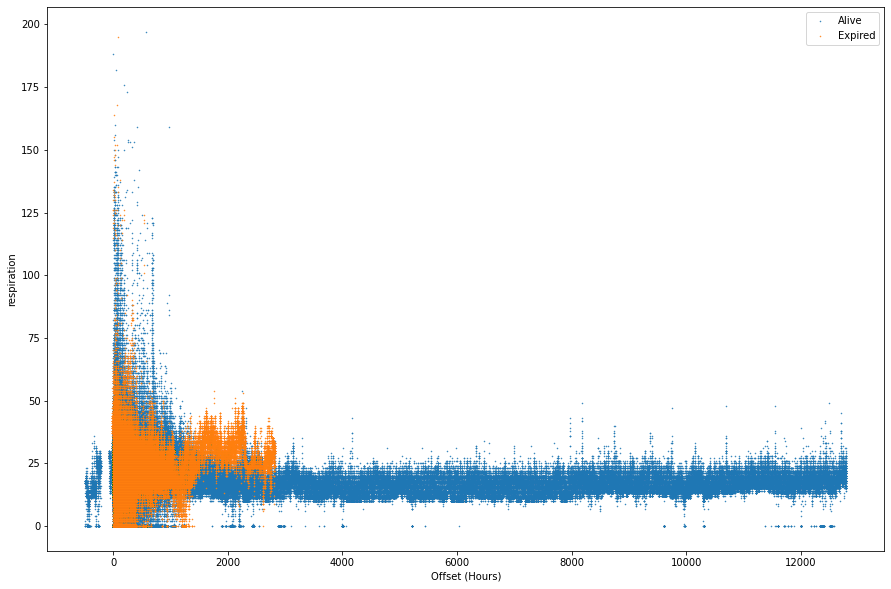

In [8]:
x_live = []
y_live = []
x_expired = []
y_expired = []

for pid in pid_arf_valid:
    data = load_patient_data_by_id(DATABASE_DIR, pid)
    
    admittime = data['patient']['unitadmittime24'][0]
    admittime = datetime.datetime.strptime(admittime, '%H:%M:%S').time()
    hour_since_admit = admittime.hour + admittime.minute / 60

    signal_source = data['vitalPeriodic']
    signal = signal_source['respiration']
    offset = signal_source['observationoffset']
    offset = [i / 60 + hour_since_admit for i in offset]

    if data['patient']['unitdischargestatus'][0] == 'Alive':
        x_live += list(offset)
        y_live += list(signal)
    elif data['patient']['unitdischargestatus'][0] == 'Expired':
        x_expired += list(offset)
        y_expired += list(signal)
        
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(x_live, y_live, marker='.', ms=1, linestyle = 'None')
ax.plot(x_expired, y_expired, marker='.', ms=1, linestyle = 'None')
ax.legend(["Alive", "Expired"])
ax.set_xlabel("Offset (Hours)")
ax.set_ylabel('respiration')

Text(0, 0.5, 'nettotal')

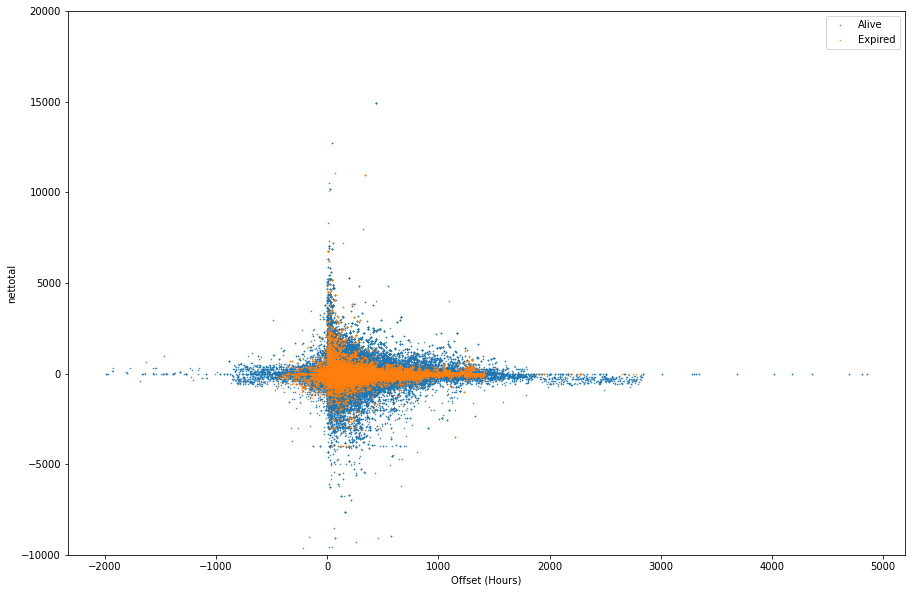

In [12]:
x_live = []
y_live = []
x_expired = []
y_expired = []

for pid in pid_arf_valid:
    data = load_patient_data_by_id(DATABASE_DIR, pid)
    
    admittime = data['patient']['unitadmittime24'][0]
    admittime = datetime.datetime.strptime(admittime, '%H:%M:%S').time()
    hour_since_admit = admittime.hour + admittime.minute / 60

    signal_source = data['intakeOutput']
    signal = signal_source['nettotal']
    offset = signal_source['intakeoutputoffset']
    offset = [i / 60 + hour_since_admit for i in offset]

    if data['patient']['unitdischargestatus'][0] == 'Alive':
        x_live += list(offset)
        y_live += list(signal)
    elif data['patient']['unitdischargestatus'][0] == 'Expired':
        x_expired += list(offset)
        y_expired += list(signal)
        
        
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(x_live, y_live, marker='.', ms=1, linestyle = 'None')
ax.plot(x_expired, y_expired, marker='.', ms=1, linestyle = 'None')
ax.legend(["Alive", "Expired"])
ax.set_ylim([-10000, 20000])
ax.set_xlabel("Offset (Hours)")
ax.set_ylabel('nettotal')

ValueError: x and y must have same first dimension, but have shapes (130568,) and (92334,)

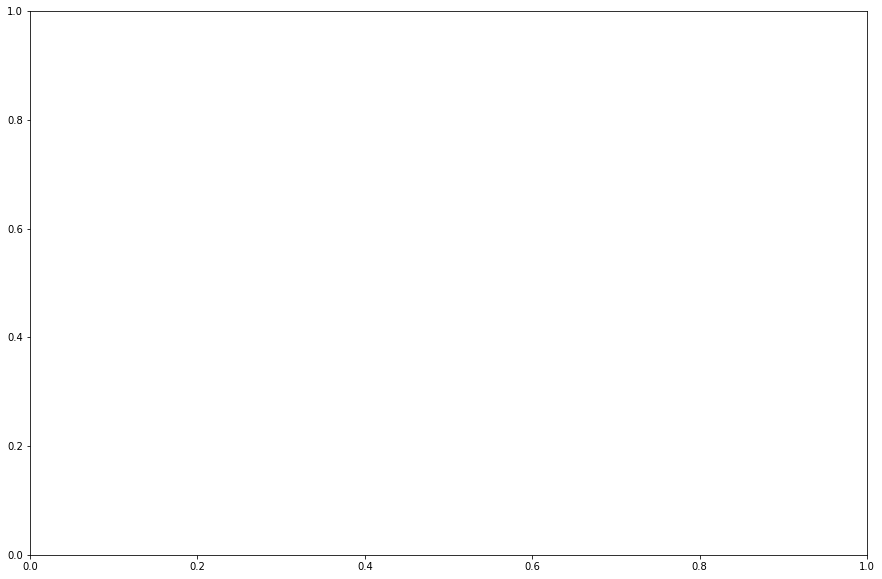

In [13]:
x_live = []
y_live = []
x_expired = []
y_expired = []

for pid in pid_arf_valid:
    data = load_patient_data_by_id(DATABASE_DIR, pid)
    
    admittime = data['patient']['unitadmittime24'][0]
    admittime = datetime.datetime.strptime(admittime, '%H:%M:%S').time()
    hour_since_admit = admittime.hour + admittime.minute / 60

    subset_idx = select_entry_subset(data, 'intakeOutput', 'celllabel', 'Urine')
    urine = select_list_subset_with_index(data['intakeOutput']['cellvaluenumeric'], subset_idx)
    urine_offset = np.array(data['intakeOutput']['intakeoutputoffset'])[subset_idx].tolist()
    offset = [i / 60 + hour_since_admit for i in urine_offset]

    if data['patient']['unitdischargestatus'][0] == 'Alive':
        x_live += list(offset)
        y_live += list(signal)
    elif data['patient']['unitdischargestatus'][0] == 'Expired':
        x_expired += list(offset)
        y_expired += list(signal)
        
        
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(x_live, y_live, marker='.', ms=1, linestyle = 'None')
ax.plot(x_expired, y_expired, marker='.', ms=1, linestyle = 'None')
ax.legend(["Alive", "Expired"])
ax.set_xlabel("Offset (Hours)")
ax.set_ylabel('urine')